In [194]:
# DataSet: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction
# Name: Credit Card Approval Predication

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 10)
import seaborn as sns

In [196]:
df1 = pd.read_csv('Credit_card.csv')
df2 = pd.read_csv('Credit_card_label.csv')

In [197]:
df1.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [198]:
df2.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [199]:
# merge df1 and df2 based on Ind_ID
df = pd.merge(df1, df2, on='Ind_ID')

In [200]:
# deleting irrelevante columns
df.drop(columns=['Mobile_phone', 'Work_Phone', 'Phone', 'Ind_ID', 'EMAIL_ID'], inplace=True)

In [201]:
df.head(2)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,NaN,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1


In [202]:
# drop null value in GENDER
df.dropna(subset=['GENDER'], inplace=True)

In [203]:
# map binary categorical data to numerical
df['GENDER'] = df['GENDER'].map({'M': 0, 'F': 1})
df['Car_Owner'] = df['Car_Owner'].map({'N': 0, 'Y': 1})
df['Propert_Owner'] = df['Propert_Owner'].map({'N': 0, 'Y': 1})

In [204]:
df.head(2)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,label
0,0,1,1,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,NaN,2,1
1,1,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1


In [205]:
df.shape

(1541, 14)

In [206]:
df.isnull().sum()

,0
GENDER,0
Car_Owner,0
Propert_Owner,0
CHILDREN,0
Annual_income,23
Type_Income,0
EDUCATION,0
Marital_status,0
Housing_type,0
Birthday_count,22


In [207]:
# fill Annual Income with groupby income_type -> median
df['Annual_income'] = df.groupby('Type_Income')['Annual_income'].transform(lambda x: x.fillna(x.median()))

In [208]:
# drop Birthday_count nan value
df.dropna(subset=['Birthday_count'], inplace=True)

In [209]:
# drop type_Occuption due to large number of null values
df.drop(columns=['Type_Occupation'], inplace=True)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1519 entries, 0 to 1547
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GENDER          1519 non-null   int64  
 1   Car_Owner       1519 non-null   int64  
 2   Propert_Owner   1519 non-null   int64  
 3   CHILDREN        1519 non-null   int64  
 4   Annual_income   1519 non-null   float64
 5   Type_Income     1519 non-null   object 
 6   EDUCATION       1519 non-null   object 
 7   Marital_status  1519 non-null   object 
 8   Housing_type    1519 non-null   object 
 9   Birthday_count  1519 non-null   float64
 10  Employed_days   1519 non-null   int64  
 11  Family_Members  1519 non-null   int64  
 12  label           1519 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 166.1+ KB


**removing outlier **

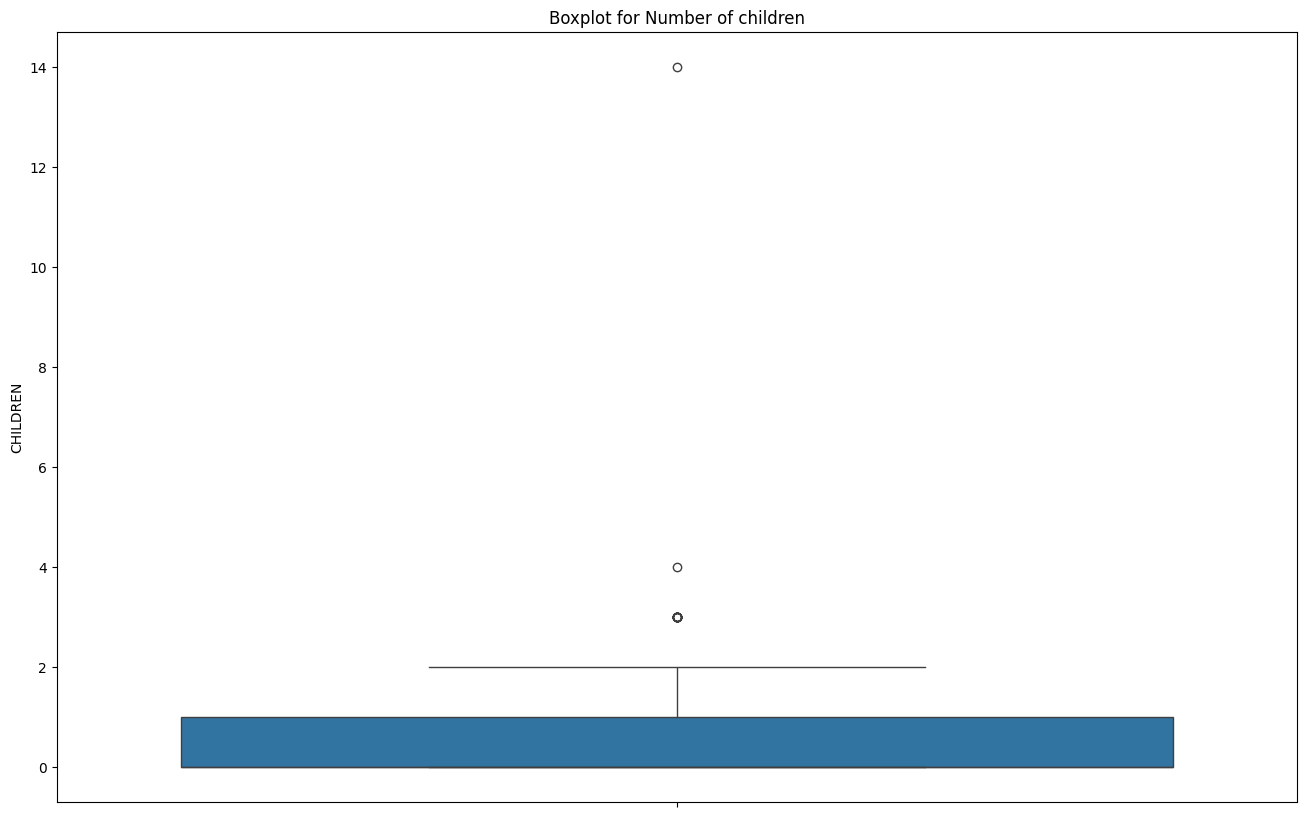

In [211]:
sns.boxplot(df['CHILDREN'])
plt.title("Boxplot for Number of children")
plt.show()

In [212]:
df['CHILDREN'].value_counts()

,count
CHILDREN,
0,1069
1,301
2,131
3,16
4,1
14,1


In [213]:
# cap children at 3
df = df[df['CHILDREN'] <= 3]

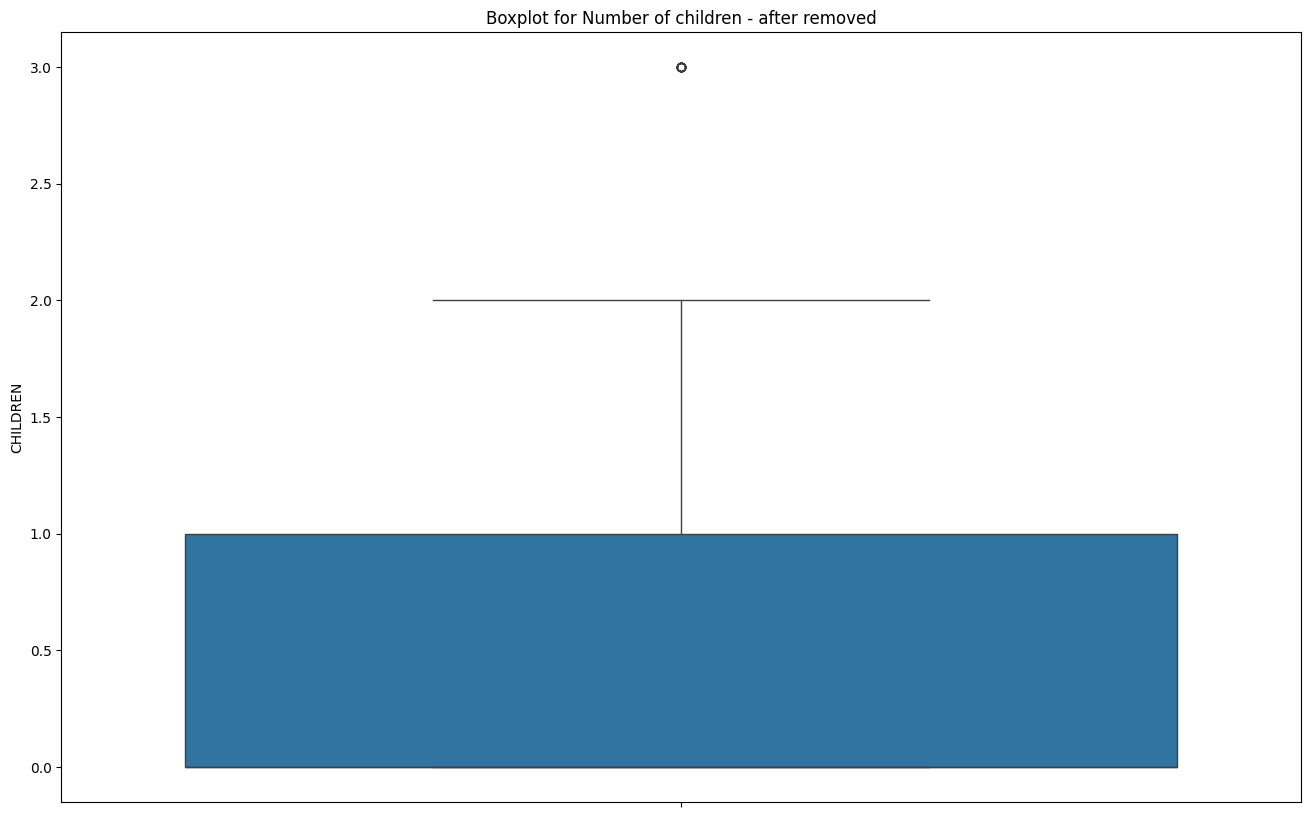

In [214]:
sns.boxplot(df['CHILDREN'])
plt.title("Boxplot for Number of children - after removed")
plt.show()

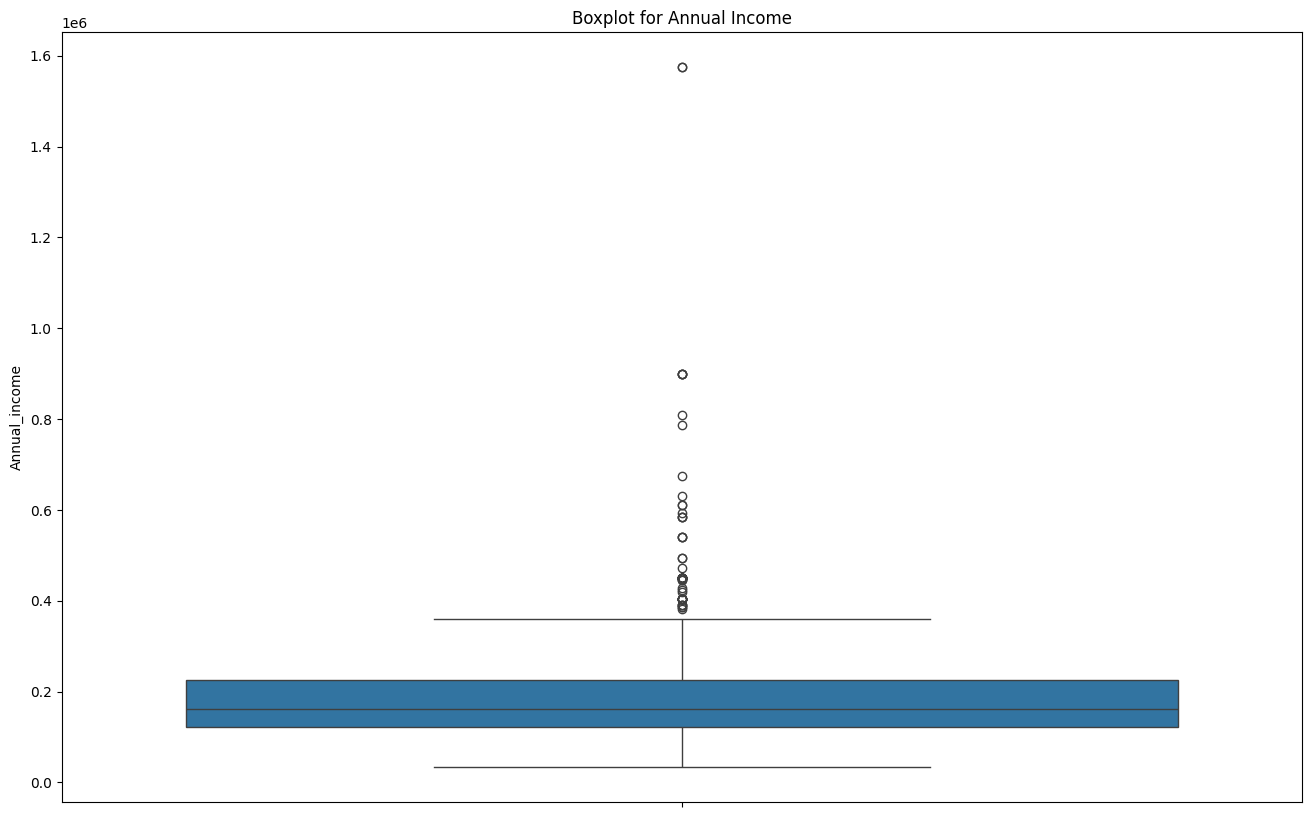

In [215]:
# box plot for annual income
sns.boxplot(df['Annual_income'])
plt.title("Boxplot for Annual Income")
plt.show()

In [216]:
df = df[df['Annual_income'] <= df['Annual_income'].quantile(0.95)]

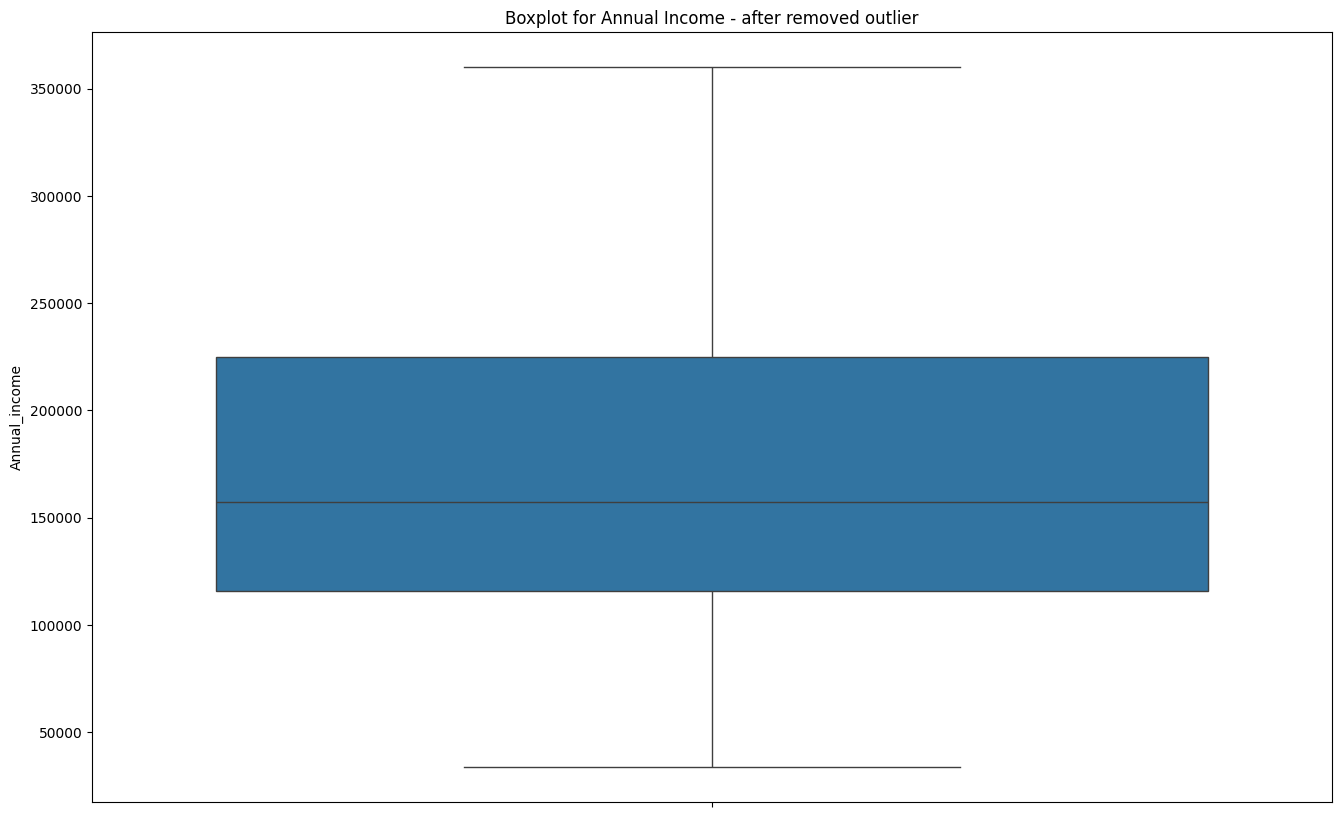

In [217]:
sns.boxplot(df['Annual_income'])
plt.title("Boxplot for Annual Income - after removed outlier")
plt.show()

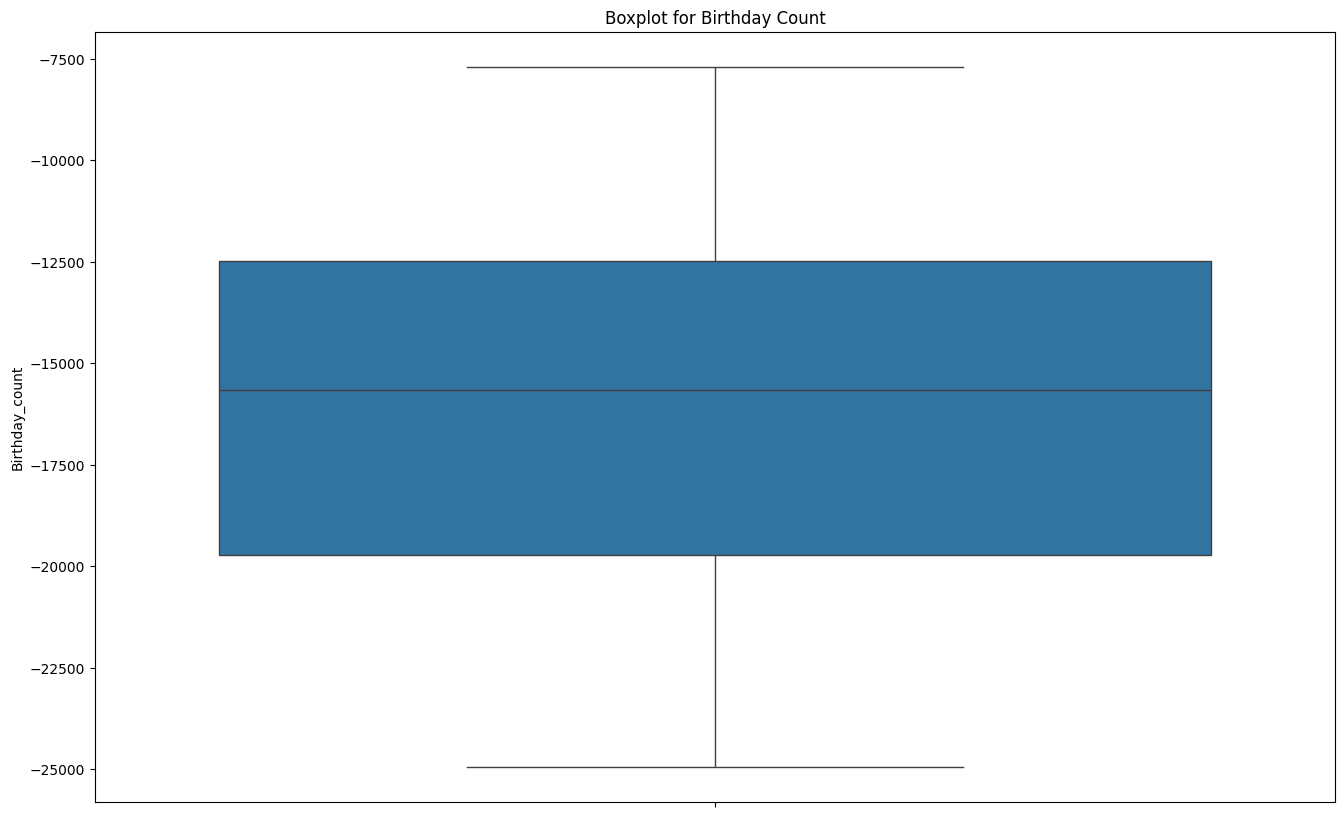

In [218]:
# birth day count
sns.boxplot(df['Birthday_count'])
plt.title("Boxplot for Birthday Count")
plt.show()

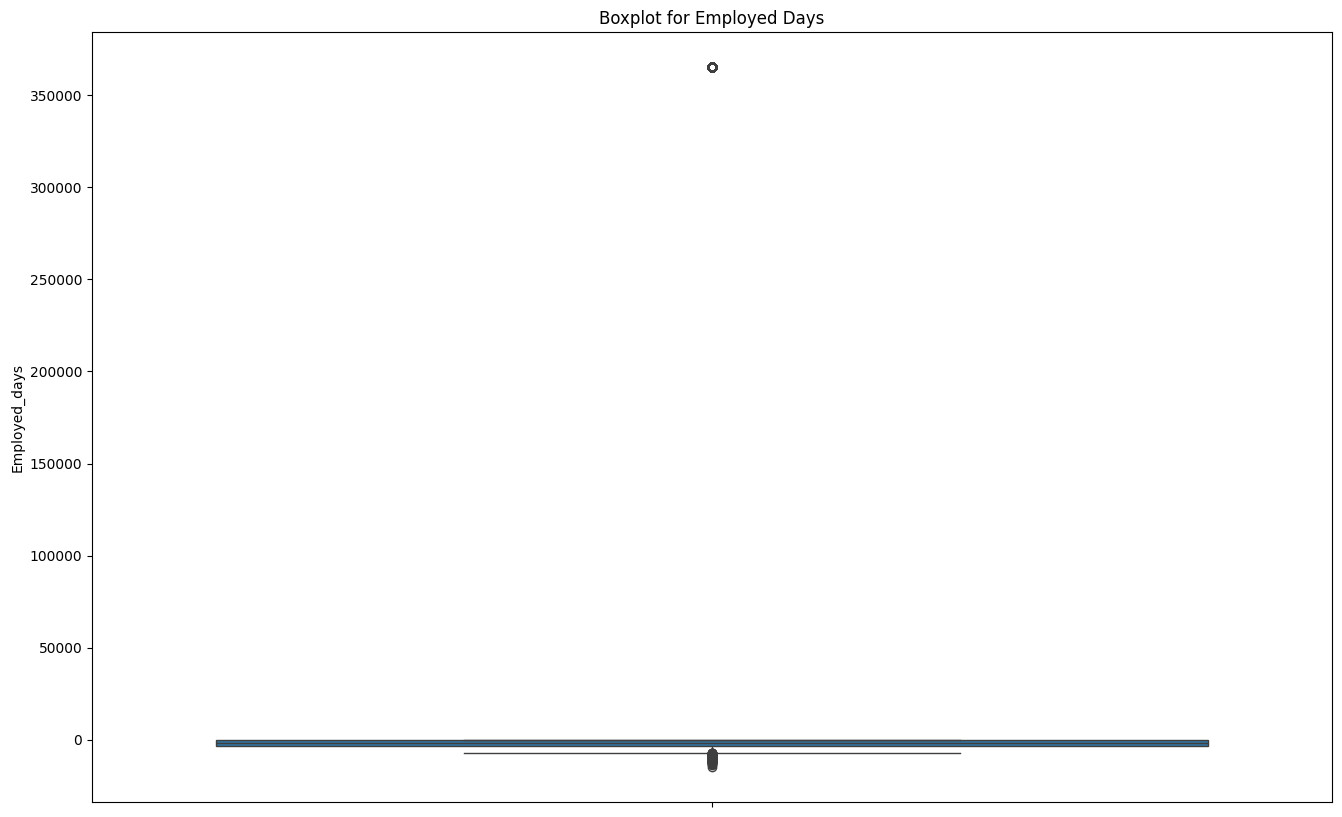

In [219]:
# Employed_days boxplot
sns.boxplot(df['Employed_days'])
plt.title("Boxplot for Employed Days")
plt.show()

In [220]:
df['Employed_days'] = df['Employed_days'].apply(lambda x: 0 if x > 0 else x)
df['Employed_days'] = df['Employed_days'].apply(lambda x: abs(x))

In [221]:
# Cap values above the 95th percentile
threshold_95 = df['Employed_days'].quantile(0.95)
df['Employed_days'] = df['Employed_days'].apply(lambda x: min(x, threshold_95))

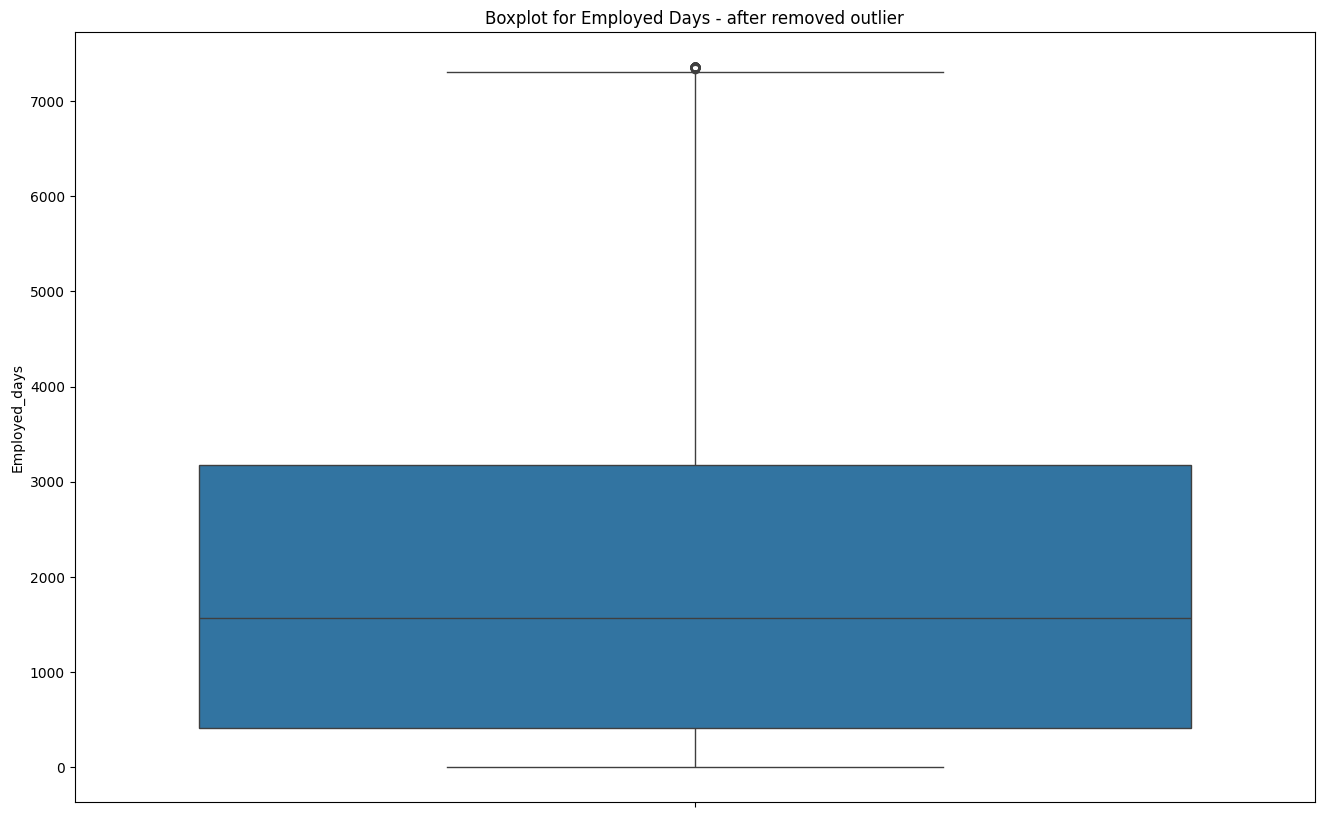

In [222]:
sns.boxplot(df['Employed_days'])
plt.title("Boxplot for Employed Days - after removed outlier")
plt.show()

In [223]:
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Family_Members,label
0,0,1,1,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,0.0,2,1
1,1,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,586.0,2,1
3,1,1,0,0,202500.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,586.0,2,1
4,1,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,586.0,2,1
6,1,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,586.0,2,1


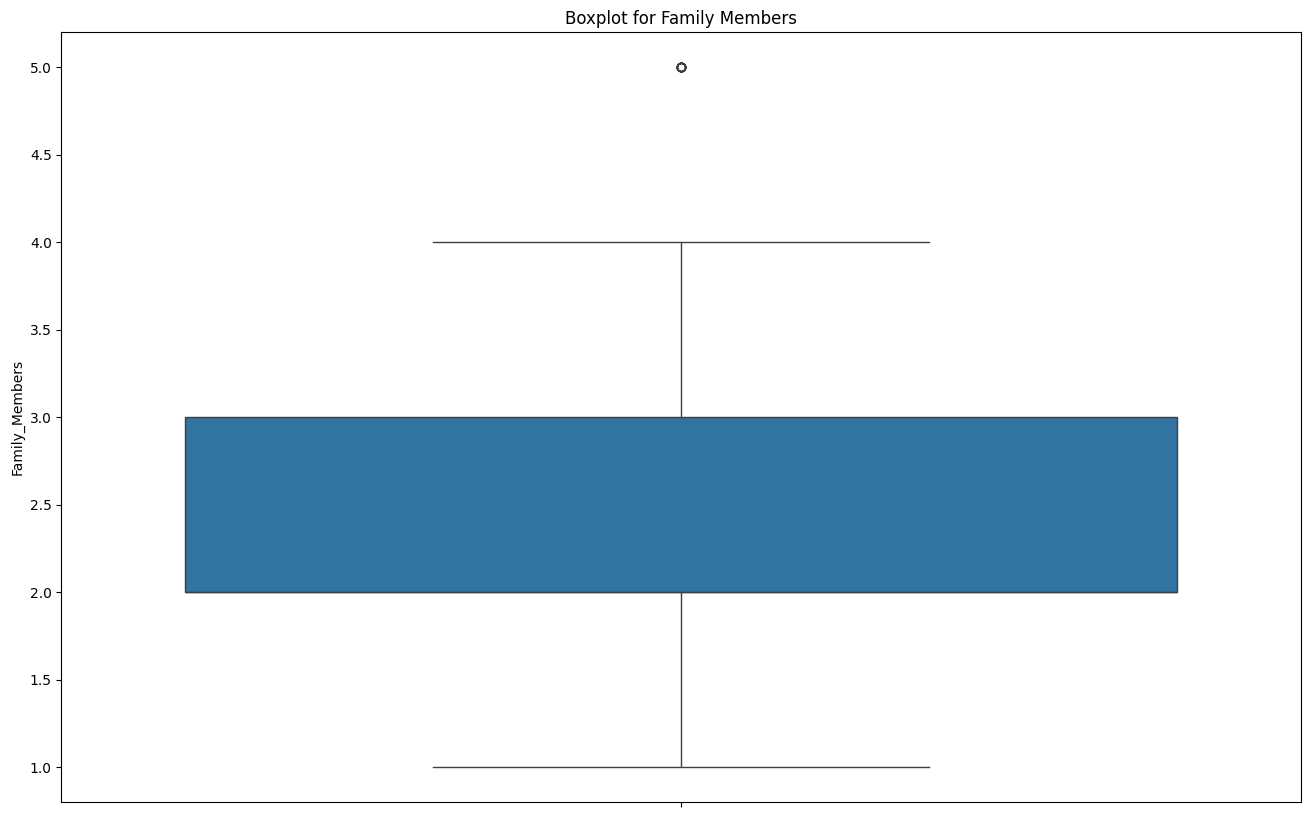

In [224]:
# boxplot for family member
sns.boxplot(df['Family_Members'])
plt.title("Boxplot for Family Members")
plt.show()

In [225]:
# rename label to target
df.rename(columns={'label': 'Target'}, inplace=True)

In [226]:
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Family_Members,Target
0,0,1,1,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,0.0,2,1
1,1,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,586.0,2,1
3,1,1,0,0,202500.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,586.0,2,1
4,1,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,586.0,2,1
6,1,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,586.0,2,1


In [227]:
# check how balance data is
df['Target'].value_counts()

,count
Target,
0,1297
1,151


EDA

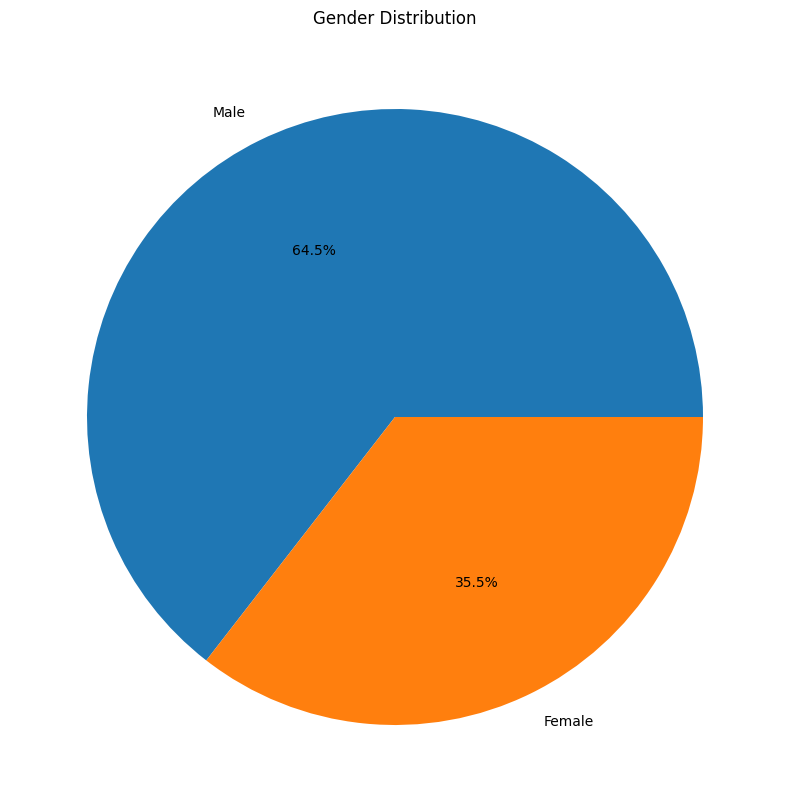

In [228]:
# gender distribution
plt.pie(df['GENDER'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

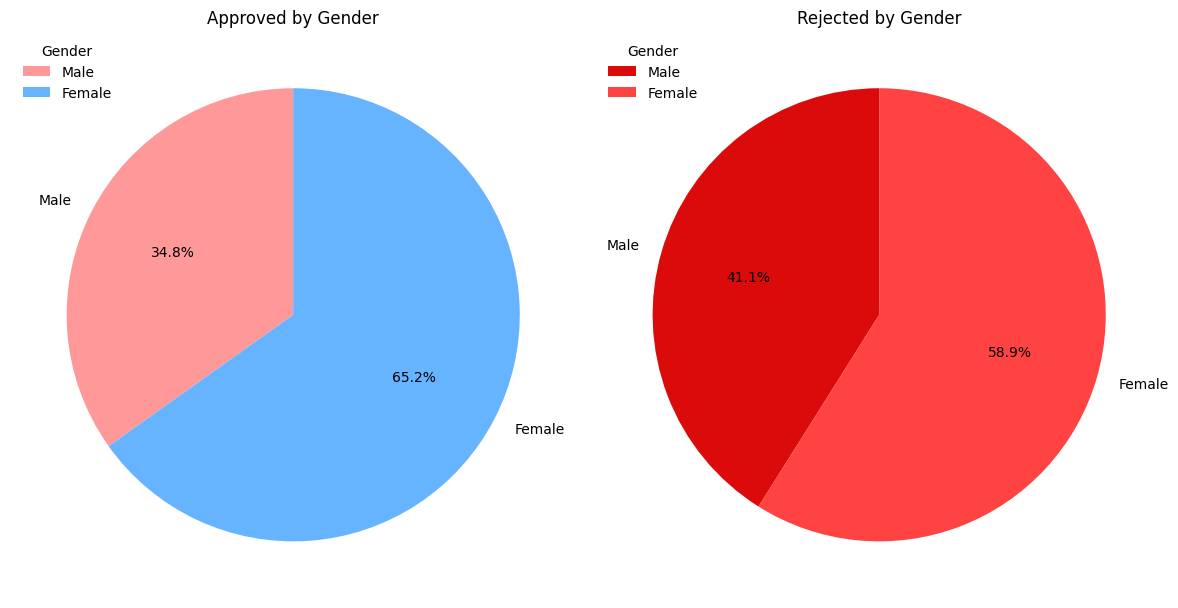

In [229]:
# Count the number of approvals and rejections by gender
ApprovedByGender = df[df['Target'] == 0].groupby('GENDER')['Target'].count()
RejectedByGender = df[df['Target'] == 1].groupby('GENDER')['Target'].count()

# gender mapping
gender_map = {0: 'Male', 1: 'Female'}
ApprovedByGender.index = ApprovedByGender.index.map(gender_map)
RejectedByGender.index = RejectedByGender.index.map(gender_map)

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Plot Pie chart for approved by gender
axes[0].pie(ApprovedByGender, labels=ApprovedByGender.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
axes[0].set_title('Approved by Gender')
axes[0].legend(labels=ApprovedByGender.index, loc='upper left', title='Gender', frameon=False)

# Plot Pie chart for rejected by gender
axes[1].pie(RejectedByGender, labels=RejectedByGender.index, autopct='%1.1f%%', startangle=90, colors=['#db0b0b', '#ff4242'])
axes[1].set_title('Rejected by Gender')
axes[1].legend(labels=RejectedByGender.index, loc='upper left', title='Gender', frameon=False)

# Show the plots
plt.tight_layout()
plt.show()

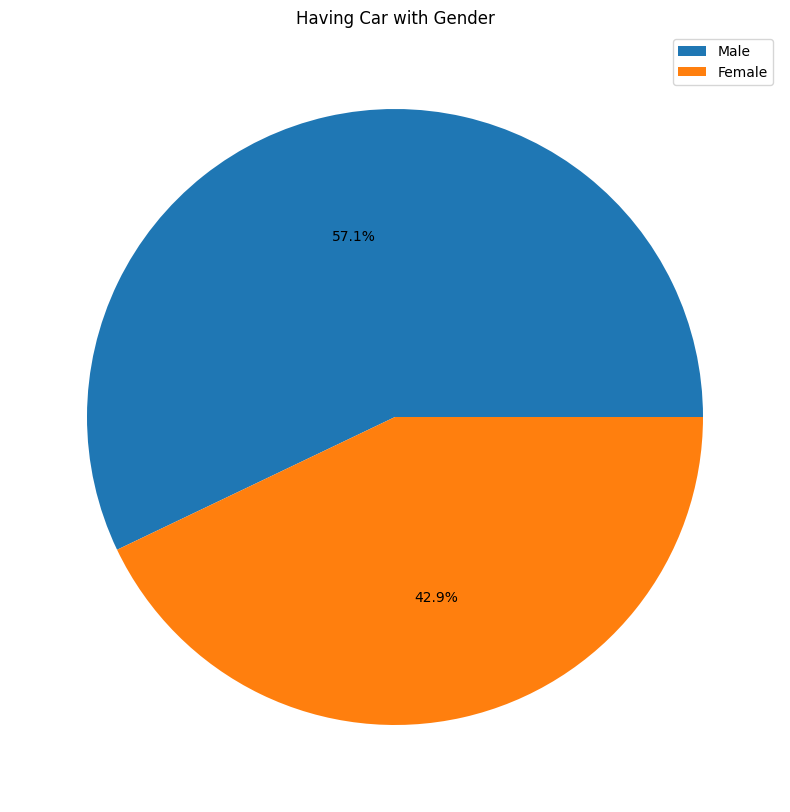

In [230]:
# having car with gender
plt.pie(df[df['Car_Owner']==1].groupby('GENDER')['Car_Owner'].value_counts(), autopct='%1.1f%%')
plt.title('Having Car with Gender')
plt.legend(labels=['Male', 'Female'])
plt.show()

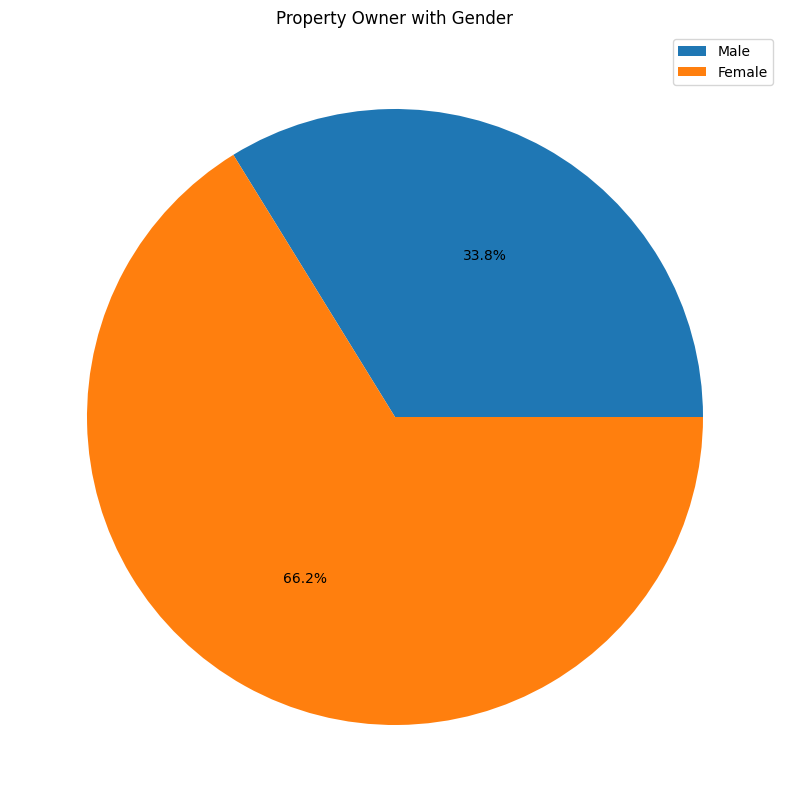

In [231]:
# plot for property owner by gender
plt.pie(df[df['Propert_Owner']==1].groupby('GENDER')['Propert_Owner'].value_counts(), autopct='%1.1f%%')
plt.title('Property Owner with Gender')
plt.legend(labels=['Male', 'Female'])
plt.show()

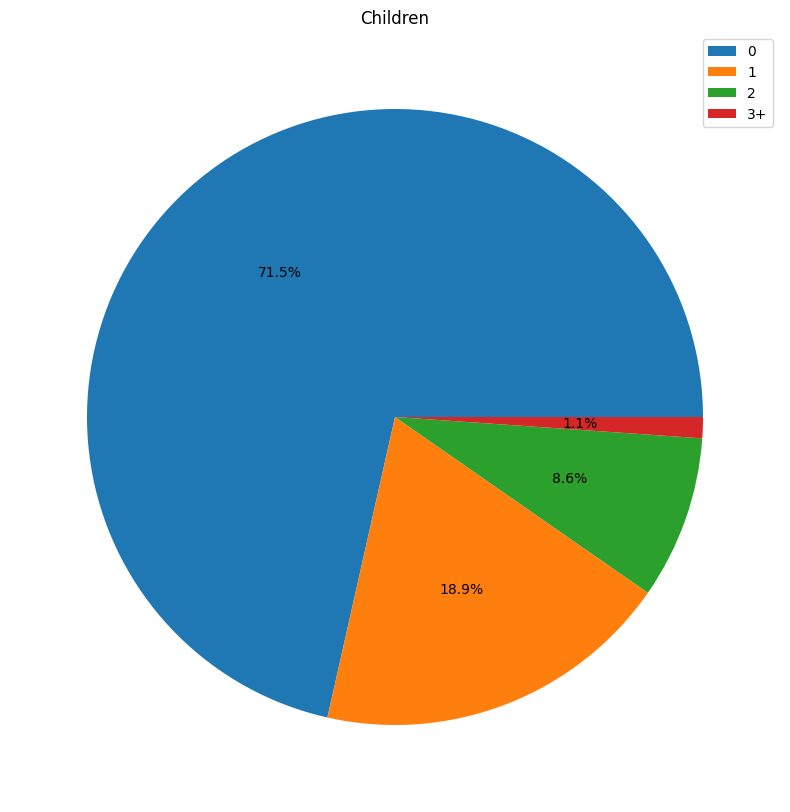

In [232]:
# childeren plot
plt.pie(df.groupby('CHILDREN')['CHILDREN'].value_counts(), autopct='%1.1f%%')
plt.title('Children')
plt.legend(labels=['0', '1', '2', '3+'])
plt.show()

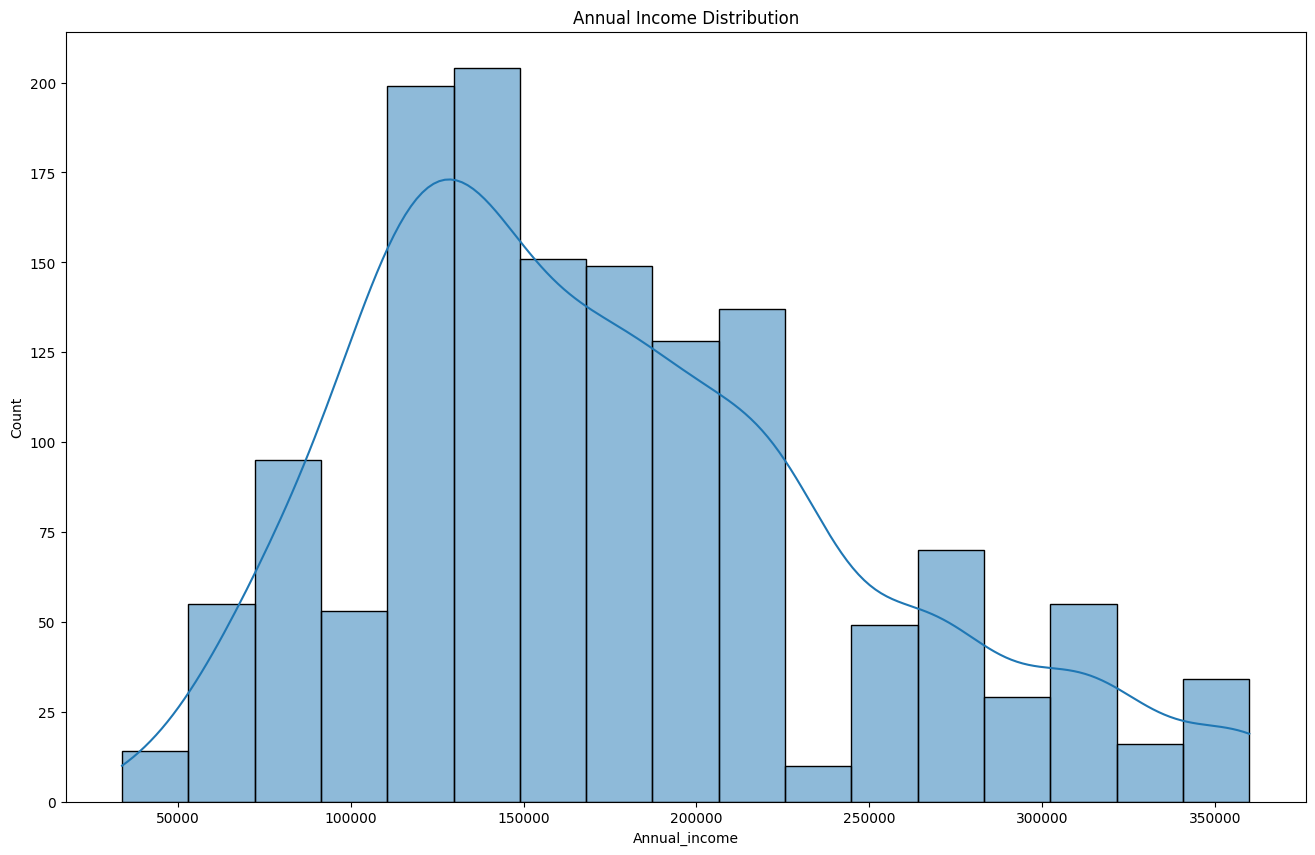

In [233]:
# annual income plot
sns.histplot(df['Annual_income'], kde=True)
plt.title('Annual Income Distribution')
plt.show()

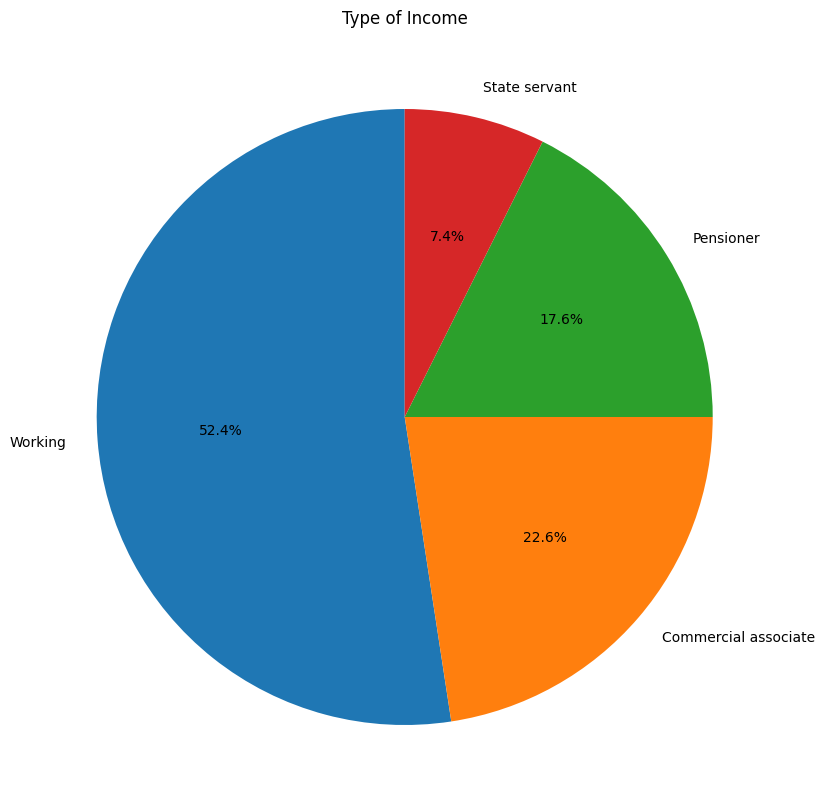

In [234]:
# type of income plot
type_income_counts = df['Type_Income'].value_counts()
plt.pie(type_income_counts, labels=type_income_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Type of Income')
plt.show()

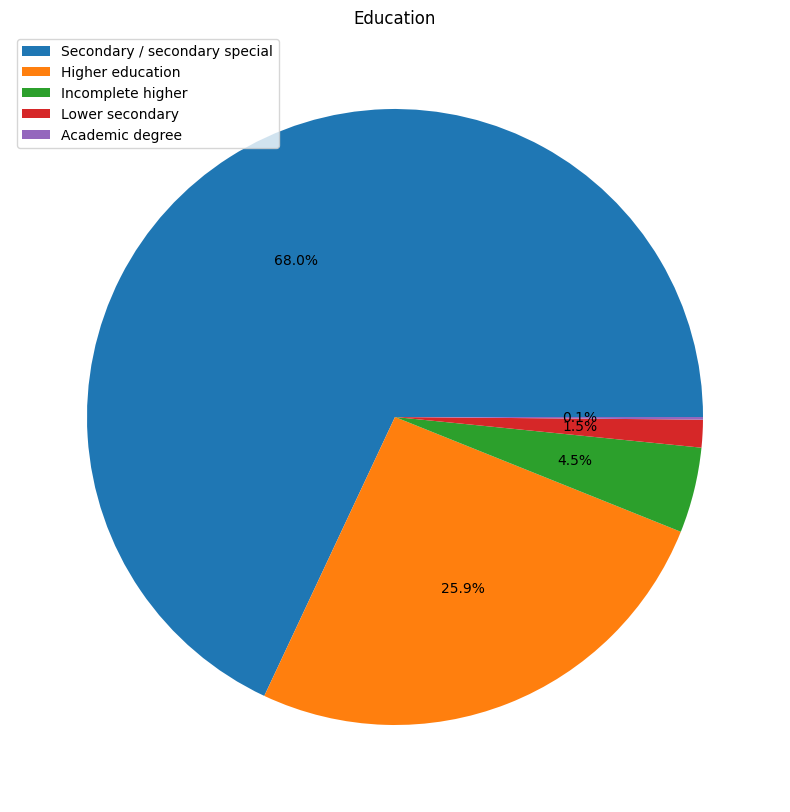

In [235]:
# plot for education
plt.pie(df['EDUCATION'].value_counts(), autopct='%1.1f%%')
plt.legend(labels=df['EDUCATION'].value_counts().index, loc='upper left')
plt.title('Education')
plt.show()

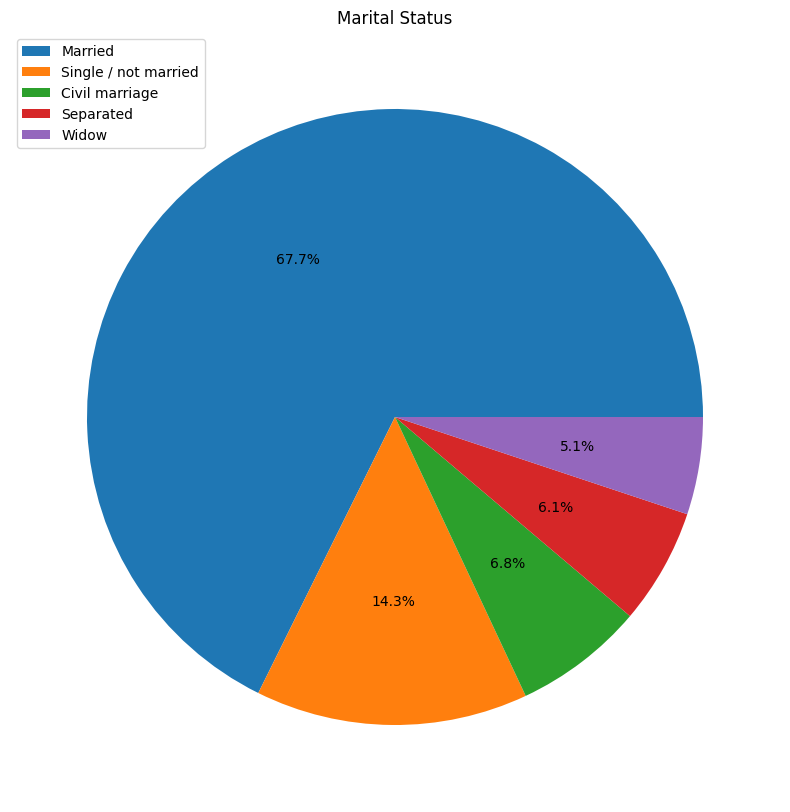

In [236]:
# plot for Marital_status
plt.pie(df['Marital_status'].value_counts(), autopct='%1.1f%%')
plt.legend(labels=df['Marital_status'].value_counts().index, loc='upper left')
plt.title('Marital Status')
plt.show()

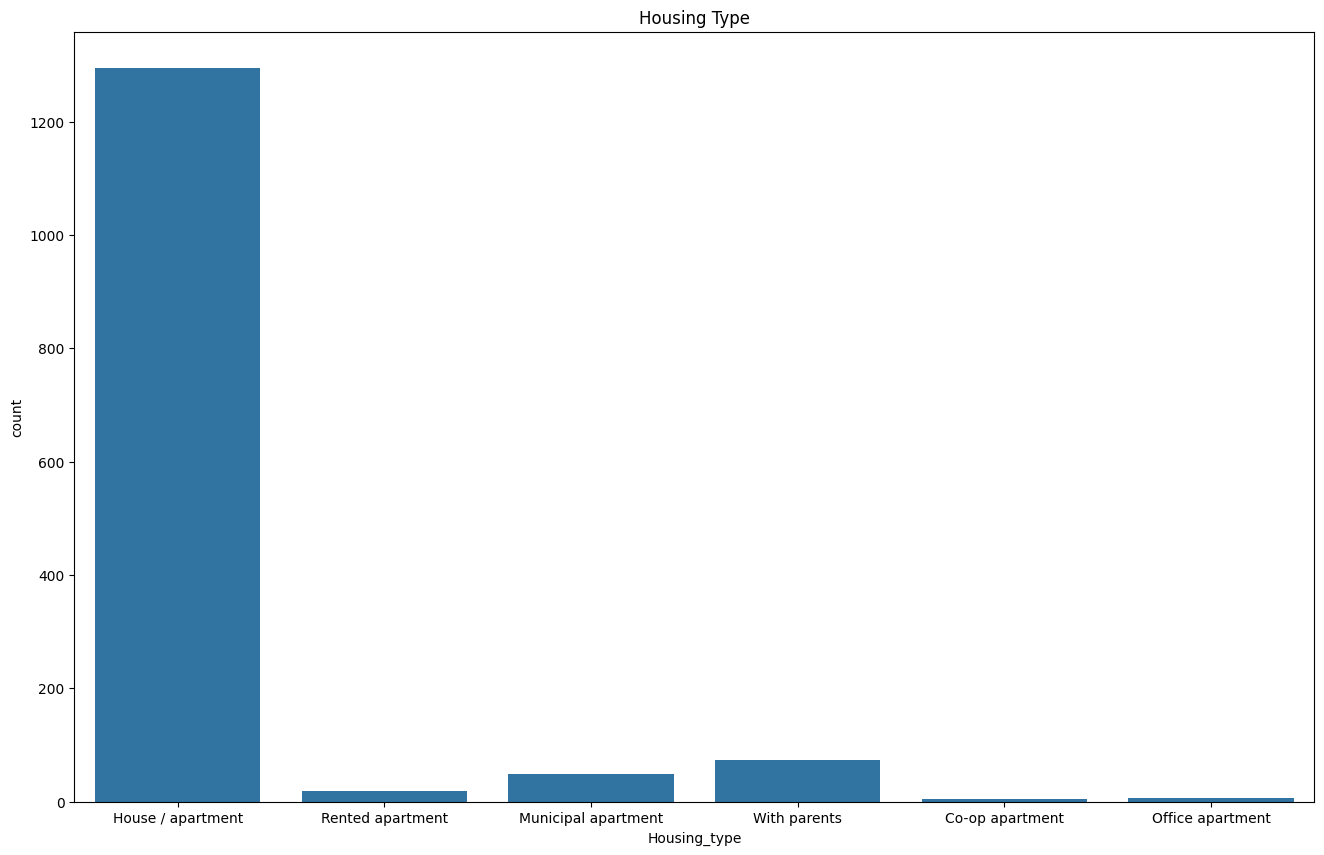

In [237]:
# plot for Housing_type
sns.countplot(data=df, x='Housing_type')
plt.title('Housing Type')
plt.show()

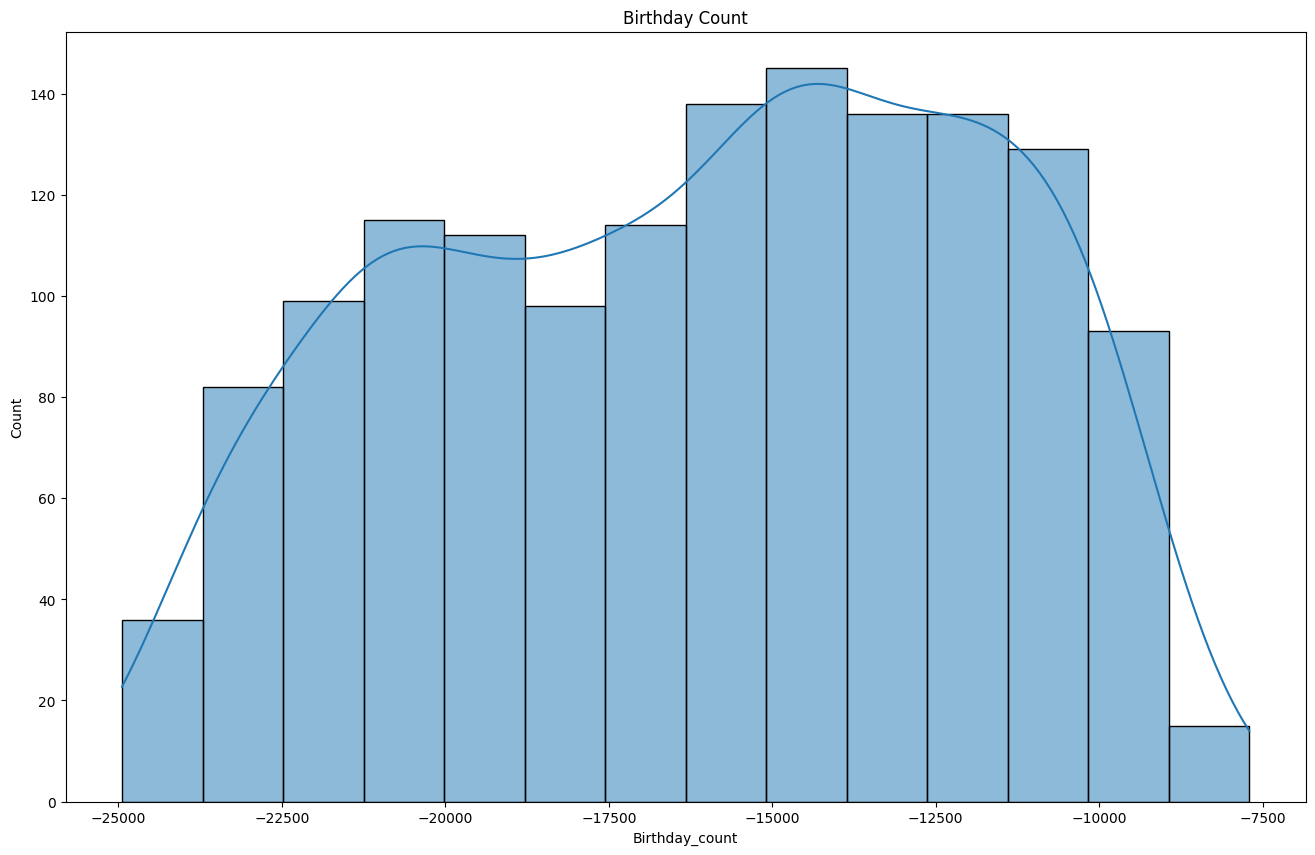

In [238]:
# plot for Birthday_count
sns.histplot(df['Birthday_count'], kde=True)
plt.title('Birthday Count')
plt.show()

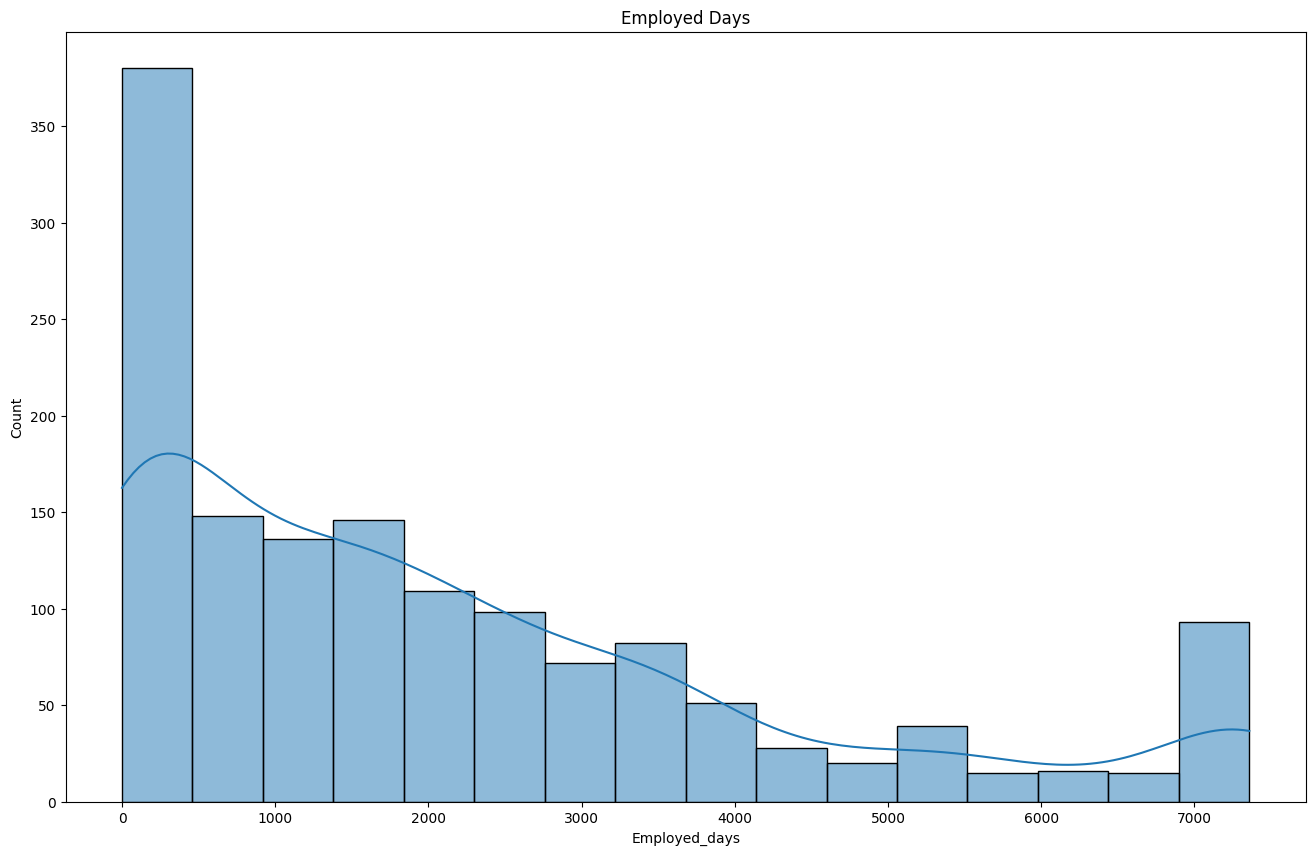

In [239]:
# plot for Employed_days
sns.histplot(df['Employed_days'], kde=True)
plt.title('Employed Days')
plt.show()

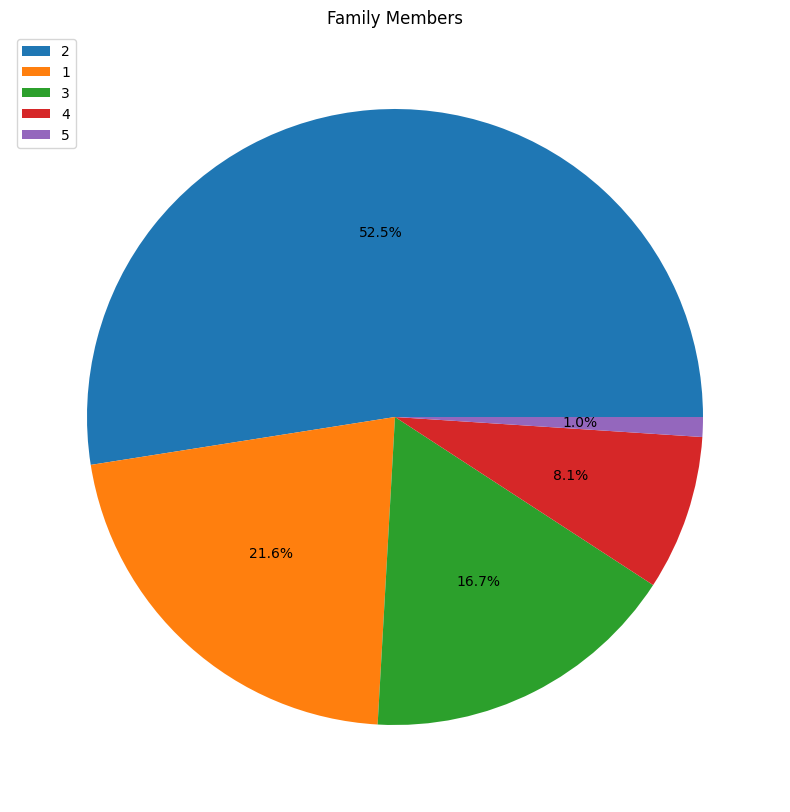

In [240]:
# plot for Family_Members
plt.pie(df['Family_Members'].value_counts(), autopct='%1.1f%%')
plt.legend(labels=df['Family_Members'].value_counts().index, loc='upper left')
plt.title('Family Members')
plt.show()

now create the model

In [250]:
from sklearn.model_selection import train_test_split
# import decison tree ]
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [242]:
# convert categorical data to numerical
df = pd.get_dummies(df, columns=['Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type'])

In [243]:
X = df.drop(columns=['Target'])
y = df['Target']

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [258]:
accuracy = accuracy_score(y_test, y_pred)

In [256]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC: {roc_auc}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Model.score", model.score(X_test, y_test))
print(f"Accuracy_socre: {accuracy}")

ROC-AUC: 0.7501056189269117
Confusion Matrix:
[[240  23]
 [ 12  15]]
Precision: 0.39473684210526316
Recall: 0.5555555555555556
F1-Score: 0.46153846153846156
Model.score 0.8793103448275862
Accuracy_socre: 0.8793103448275862
